<a href="https://colab.research.google.com/github/Tanjul5/Speech-Emotion-Recognition/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SPEECH EMOTION RECOGNITION**

# **INTRODUCTION**

Verbal Communication is valuable and sought after in workplace and classroom environments alike.
There is no denying the notion that Indians lack verbal communication and consequently lag behind in
the workplace or classroom environments. This happens despite them having strong technical
competencies. Clear and comprehensive speech is the vital backbone of strong communication and
presentation skills. Where some occupations consist mainly of presenting, most careers require and
thrive from the ability to communicate effectively. Research has shown that verbal communication
remains one of the most employable skills in both the perception of employers and new graduates. Of
the possible improvements to vocal presentations tone, disfluencies, and stutters, in particular, remain
one of the most common and prominent factors of someone’s demonstration. Millions of people are
affected by stuttering and other speech disfluencies, with the majority of the world having experienced
mild stutters while communicating under stressful conditions. Research shows that mild disfluencies
can be cured without medical help, just practicing speech regularly and constructive feedbacks are
effective ways to improve.
We, Data Scientists recognize this problem and say hello.


# **PROBLEM STATEMENT**

We will solve the above-mentioned problem by applying deep learning algorithms to audio/speech
data. The solution will be to identify emotions in speech.


DATA SOURCE USED

We have used the RAVDESS dataset in this project.It is one of the more common dataset used for this excercise by others. It's well liked because of its quality of speakers, recording and it has 24 actors of different genders. Here's the filename identifiers as per the official RAVDESS website:

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Here's an example of an audio filename. 02-01-06-01-02-01-12.mp4

Video-only (02)

Speech (01)

Fearful (06)

Normal intensity (01)

Statement “dogs” (02)

1st Repetition (01)

12th Actor (12)

Female, as the actor ID number is even.

**Analysis**

We are using Google Colab, a Google Cloud environment for jupyter, so we need to import our files from Google Drive and then install LibROSA, a python package for music and audio analysis.

After the import, we will plot the signal of the first file.

# **Importing Libraries**

In [36]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
import tensorflow as tf
import tensorflow.keras as keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD



import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [37]:
#mounting the google drive to import the dataset

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [38]:
# path to the directory
RAVD = "/content/drive/MyDrive/SPEECH_EMOTION_RECOGNITION/data/"

# **EXPLORATORY DATA ANALYSIS **

# **DATA PREPROCESSING**

In [39]:
# CREATE DIRECTORY OF AUDIO FILES 
actor_folders = os.listdir(RAVD) #list files in audio directory
actor_folders.sort() 

we have converted audio speech files into List dtype.

In [40]:
# CREATE FUNCTION TO EXTRACT EMOTION NUMBER, ACTOR AND GENDER LABEL
emotion = []
gender = []
actor = []
file_path = []
for i in actor_folders:
    filename = os.listdir(RAVD + i) #iterate over Actor folders
    for f in filename: # go through files in Actor folder
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        actor.append(int(part[6]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(RAVD + i + '/' + f)

In [41]:
# PUT EXTRACTED LABELS WITH FILEPATH INTO DATAFRAME
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor)],axis=1)
audio_df.columns = ['gender','emotion','actor']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
audio_df.head()

,gender,emotion,actor,path
0,male,neutral,1,/content/drive/MyDrive/SPEECH_EMOTION_RECOGNIT...
1,male,neutral,1,/content/drive/MyDrive/SPEECH_EMOTION_RECOGNIT...
2,male,calm,1,/content/drive/MyDrive/SPEECH_EMOTION_RECOGNIT...
3,male,calm,1,/content/drive/MyDrive/SPEECH_EMOTION_RECOGNIT...
4,male,calm,1,/content/drive/MyDrive/SPEECH_EMOTION_RECOGNIT...


# **DATA VISULIZATION**

# **1. HOW MANY ENOTIONS ARE PRESENT?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


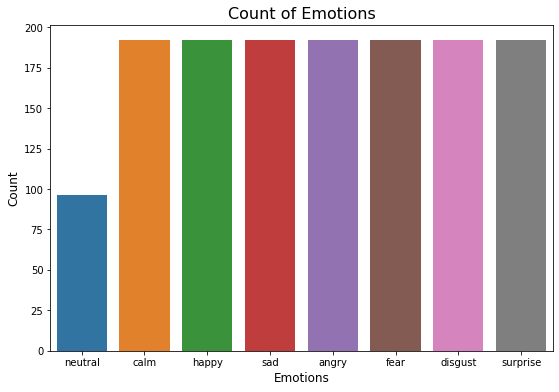

In [42]:
plt.figure(figsize=(9,6))
plt.title('Count of Emotions', size=16)
sns.countplot(audio_df.emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
# sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

***There are eight type of emotions are present in dataset as neutral, calm, happy, sad, angry, fear, disgust, surprise. Neutral emotion data is less in numbers as compared to other emotions.***

# **2. MALE AND FEMALE COUNTS IN GENDER COLUMN**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


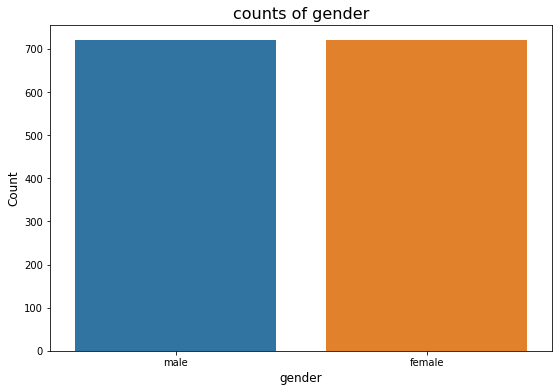

In [43]:
plt.figure(figsize=(9,6))
plt.title('counts of gender', size=16)
sns.countplot(audio_df.gender)
plt.ylabel('Count', size=12)
plt.xlabel('gender', size=12)
# sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

***Number of male and female are equally present in dataset.***

**We can also plot waveplots and spectograms for audio signals**

Waveplots - Waveplots let us know the loudness of the audio at a given time.

Spectograms - A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given audio/music signals.

**Male Happy**

Text(0.5, 1.0, 'Waveplot - Male Happy')

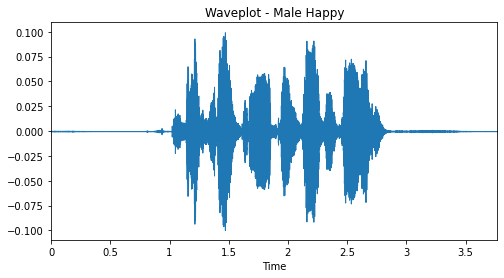

In [44]:
# DISPLAY WAVEPLOT
x, sr = librosa.load(f'/{RAVD}/Actor_03/03-01-03-01-01-01-03.wav')

# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Happy')

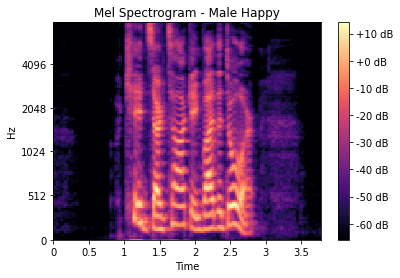

In [45]:
# CREATE LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
x = librosa.power_to_db(x)

librosa.display.specshow(x, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Happy')
plt.colorbar(format='%+2.0f dB');

**Male Angry**

Text(0.5, 1.0, 'Waveplot - Male Angry')

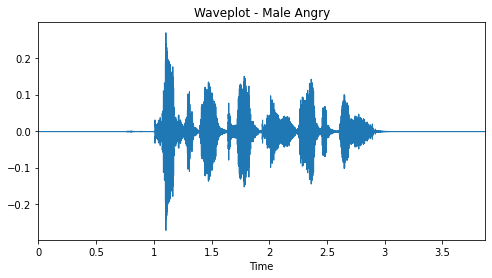

In [46]:
# LOAD FILE
x, sr = librosa.load(f'/{RAVD}/Actor_05/03-01-05-01-01-01-05.wav')
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Angry')

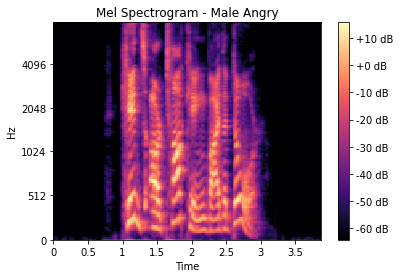

In [47]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Angry');
plt.colorbar(format='%+2.0f dB');

**Female Fearful**

Text(0.5, 1.0, 'Waveplot - Female Fearful')

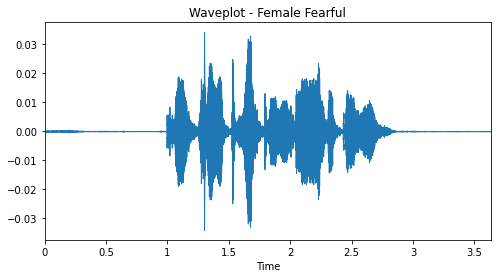

In [48]:
# LOAD FILE
x, sr = librosa.load(f'/{RAVD}/Actor_06/03-01-06-01-01-01-06.wav')
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Fearful')

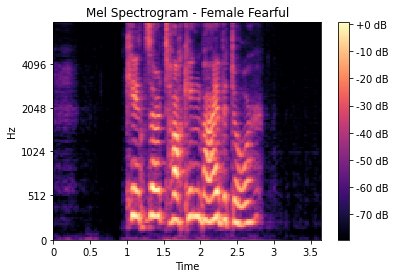

In [49]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Fearful')
plt.colorbar(format='%+2.0f dB');

**Female Surprised**

Text(0.5, 1.0, 'Waveplot - FemaleSurprised')

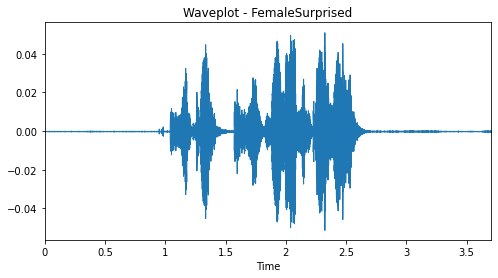

In [50]:
# LOAD FILE
x, sr = librosa.load(f'/{RAVD}/Actor_08/03-01-08-01-01-01-08.wav')
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - FemaleSurprised')

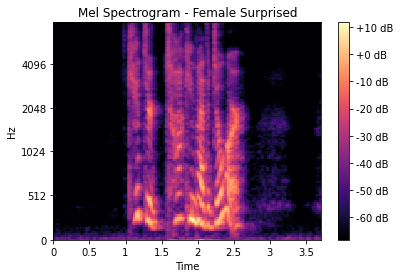

In [51]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Surprised')
plt.colorbar(format='%+2.0f dB');


So in above plots we have created a Waveplots and Mel Spectrograms for different emotions classifications.

We have extracted the audio speech files path and created a DataFrame out of it.

In [52]:
#MERGE GENDER AND EMOTION COLUMNS
audio_df['labels'] =audio_df.gender + '_' + audio_df.emotion
audio_df['source'] = 'RAVDESS'  
audio_df= audio_df.drop(['gender','emotion','actor'], axis=1)
audio_df.head()

,path,labels,source
0,/content/drive/MyDrive/SPEECH_EMOTION_RECOGNIT...,male_neutral,RAVDESS
1,/content/drive/MyDrive/SPEECH_EMOTION_RECOGNIT...,male_neutral,RAVDESS
2,/content/drive/MyDrive/SPEECH_EMOTION_RECOGNIT...,male_calm,RAVDESS
3,/content/drive/MyDrive/SPEECH_EMOTION_RECOGNIT...,male_calm,RAVDESS
4,/content/drive/MyDrive/SPEECH_EMOTION_RECOGNIT...,male_calm,RAVDESS


In [53]:
#shape of the dataframe
audio_df.shape

(1440, 3)

# **DATA AUGMENTATION**

Data augmentation is the process by which we create new synthetic data samples by adding small perturbations on our initial training set.

To generate syntactic data for audio, we can apply noise injection, shifting time, changing pitch and speed.

The objective is to make our model invariant to those perturbations and enhace its ability to generalize.

In order to this to work adding the perturbations must conserve the same label as the original training sample.

In images data augmention can be performed by shifting the image, zooming, rotating ...

First, let's check which augmentation techniques works better for our dataset.

In [54]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data
# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [55]:
# Trying different functions above
path = np.array(audio_df['path'])[471]
data, sample_rate = librosa.load(path)

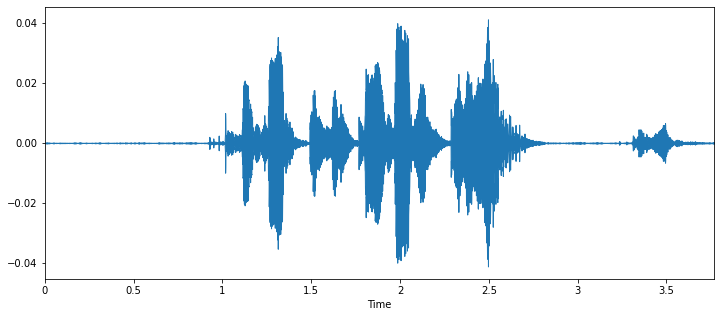

In [56]:
# NORMAL AUDIO
plt.figure(figsize=(12, 5))
librosa.display.waveplot(y=data, sr=sample_rate)
Audio(path)

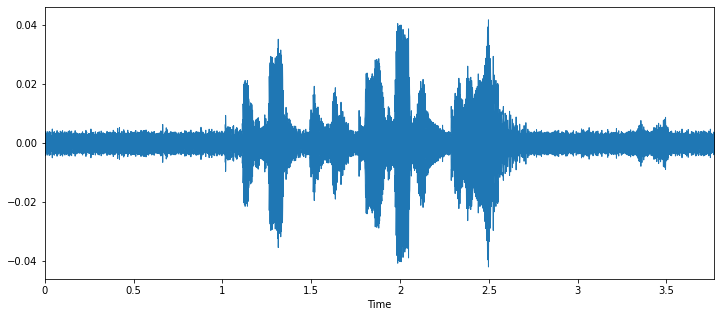

In [57]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

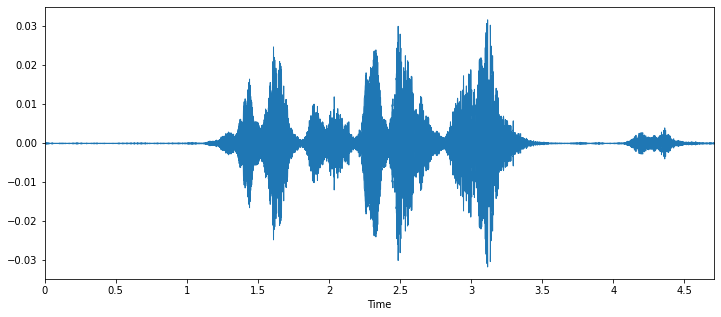

In [58]:
# STRETCHED AUDIO
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

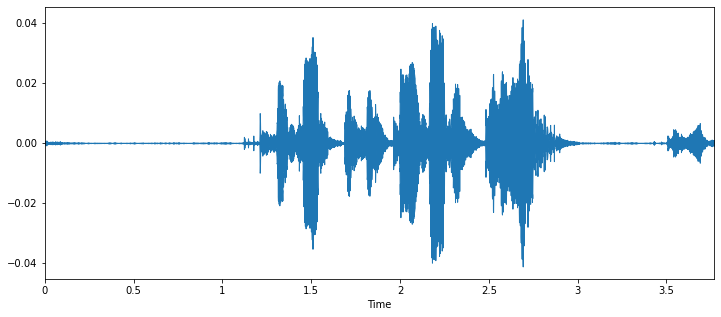

In [59]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

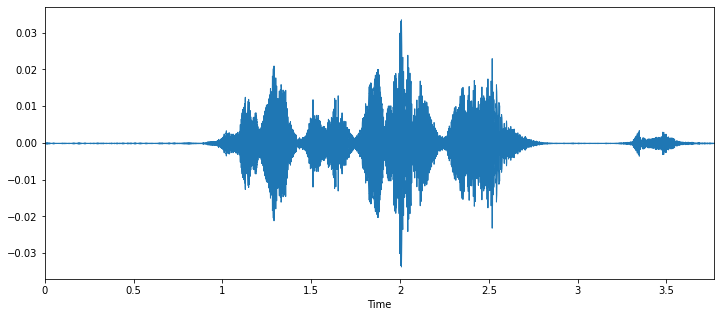

In [60]:
# AUDIO WITH PITCH
x = pitch(data, sample_rate)
plt.figure(figsize=(12, 5))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

After listening to all audio we determine to use noise, shift and stretch

From the above types of augmentation techniques i am using noise, stretching(ie. changing speed) and some pitching.

# **FEATURE EXTRACTION**

Extraction of features is a very important part in analyzing and finding relations between different things. As we already know that the data provided of audio cannot be understood by the models directly so we need to convert them into an understandable format for which feature extraction is used.

The audio signal is a three-dimensional signal in which three axes represent
time, amplitude and frequency.

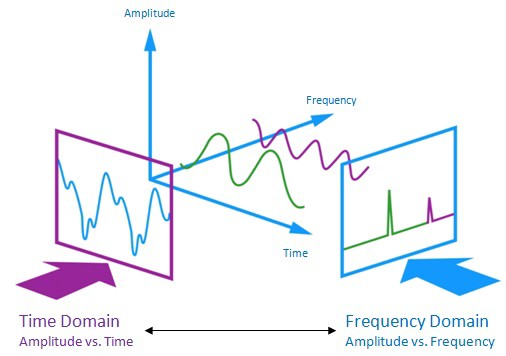

As stated there with the help of the sample rate and the sample data, one can perform several transformations on it to extract valuable features out of it.

In [61]:
def feat_ext(data):
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    return mfcc

def get_feat(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    # normal data
    res1 = feat_ext(data)
    result = np.array(res1)
    #data with noise
    noise_data = noise(data)
    res2 = feat_ext(noise_data)
    result = np.vstack((result, res2))
    #data with stretch and pitch
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = feat_ext(data_stretch_pitch)
    result = np.vstack((result, res3))
    return result

In [62]:
audio_df.head()

,path,labels,source
0,/content/drive/MyDrive/SPEECH_EMOTION_RECOGNIT...,male_neutral,RAVDESS
1,/content/drive/MyDrive/SPEECH_EMOTION_RECOGNIT...,male_neutral,RAVDESS
2,/content/drive/MyDrive/SPEECH_EMOTION_RECOGNIT...,male_calm,RAVDESS
3,/content/drive/MyDrive/SPEECH_EMOTION_RECOGNIT...,male_calm,RAVDESS
4,/content/drive/MyDrive/SPEECH_EMOTION_RECOGNIT...,male_calm,RAVDESS


In [63]:
X, Y = [], []
for path, emotion in zip(audio_df['path'], audio_df['labels']):
    feature = get_feat(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [64]:
Emotions = pd.DataFrame(X)
Emotions['lables'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,lables
0,-646.141479,73.066620,0.403144,16.848043,9.805768,1.096762,-4.758567,-3.821855,-14.999225,-3.379040,...,-3.628367,2.119565,-4.571882,0.182455,1.418681,-5.783636,-2.084638,-2.130159,-0.869078,male_neutral
1,-504.938726,43.347418,5.703660,10.810662,6.680984,-0.778927,-4.383558,-7.504829,-11.822609,-6.829262,...,-2.387595,-1.648947,-2.352041,-0.965432,0.157539,-4.906332,-3.961611,-0.186602,-3.112195,male_neutral
2,-708.562988,69.493507,-1.611814,17.750267,7.006419,-0.331726,-8.311820,-6.556706,-17.368668,-0.728303,...,-3.099442,0.685577,-5.102811,-0.052138,-2.975414,-6.936914,-1.737013,-2.334762,-4.732290,male_neutral
3,-643.539185,74.687790,-1.654426,16.667934,5.185094,0.672246,-4.452597,-7.804122,-15.013509,-5.399968,...,-4.113428,1.270108,-4.779651,-3.539862,1.090910,-7.247007,-4.063982,-0.514474,0.192338,male_neutral
4,-471.037244,37.975300,8.591737,10.532759,3.041456,0.200751,-3.121563,-9.115330,-9.880986,-5.751160,...,-1.624072,-1.448795,-3.152090,-2.781943,-0.216246,-4.244324,-3.937739,0.657797,-1.832117,male_neutral


In [65]:
# can use this directly from saved feature .csv file
Emotions = pd.read_csv('./emotion.csv')

# Data Preparation

As of now we have extracted the data, now we need to normalize and split our data for training and testing.

In [66]:
X = Emotions.iloc[: ,:-1].values
Y = Emotions.iloc[: , -1:].values

In [67]:
# As this is a multiclass classification problem onehotencoding our Y
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [68]:
# Train and Test Split 
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 20), (3240, 16), (1080, 20), (1080, 16))

In [69]:
# Reshape for LSTM 
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [70]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 20), (3240, 16), (1080, 20), (1080, 16))

# **MODELLING**

# **DECISION TREE**

In [71]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT = DT.fit(x_train,y_train)

y_pred = DT.predict(x_test)

In [72]:
print("Training set score: {:.3f}".format(DT.score(x_train, y_train)))
print("Test set score: {:.3f}".format(DT.score(x_test, y_test)))

Training set score: 1.000
Test set score: 0.394


# **KNN**

In [73]:
from sklearn.neighbors import KNeighborsClassifier
clf1=KNeighborsClassifier(n_neighbors=4)
clf1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [74]:
y_pred=clf1.predict(x_test)

In [75]:
print("Training set score: {:.3f}".format(clf1.score(x_train, y_train)))
print("Test set score: {:.3f}".format(clf1.score(x_test, y_test)))

Training set score: 0.645
Test set score: 0.445


Using KNN in our dataset the overall training is quite good but not for deployment and test accuracy has .50

# **MLP CLASSIFIER**

In [76]:
from sklearn.neural_network import MLPClassifier
clf2=MLPClassifier(alpha=0.01, batch_size=270, epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='adaptive', max_iter=400)
clf2.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=0.01, batch_size=270, hidden_layer_sizes=(400,),
              learning_rate='adaptive', max_iter=400)

In [77]:
print("Training set score: {:.3f}".format(clf2.score(x_train, y_train)))
print("Test set score: {:.3f}".format(clf2.score(x_test, y_test)))

Training set score: 0.949
Test set score: 0.607


Using MLP Classifier he gave good accuracy in training dataset but not good for our test set, So we did not use for deployment.

# **LSTM (Long Short-Term Memory)**

In [78]:
model01=Sequential()
model01.add(LSTM(70,return_sequences=True,input_shape=(20,1)))
model01.add(LSTM(50,return_sequences=True))
model01.add(LSTM(60))
model01.add(Dense(16))
model01.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [80]:
model01.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 70)            20160     
                                                                 
 lstm_1 (LSTM)               (None, 20, 50)            24200     
                                                                 
 lstm_2 (LSTM)               (None, 60)                26640     
                                                                 
 dense (Dense)               (None, 16)                976       
                                                                 
Total params: 71,976
Trainable params: 71,976
Non-trainable params: 0
_________________________________________________________________


In [81]:
 model01.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=65,verbose=1)

Epoch 1/100
50/50 [==============================] - 12s 53ms/step - loss: 0.0572 - accuracy: 0.1583 - val_loss: 0.0556 - val_accuracy: 0.1954
Epoch 2/100
50/50 [==============================] - 1s 23ms/step - loss: 0.0547 - accuracy: 0.2231 - val_loss: 0.0545 - val_accuracy: 0.2278
Epoch 3/100
50/50 [==============================] - 1s 24ms/step - loss: 0.0540 - accuracy: 0.2444 - val_loss: 0.0538 - val_accuracy: 0.2519
Epoch 4/100
50/50 [==============================] - 1s 24ms/step - loss: 0.0533 - accuracy: 0.2645 - val_loss: 0.0534 - val_accuracy: 0.2602
Epoch 5/100
50/50 [==============================] - 1s 23ms/step - loss: 0.0529 - accuracy: 0.2762 - val_loss: 0.0532 - val_accuracy: 0.2593
Epoch 6/100
50/50 [==============================] - 1s 23ms/step - loss: 0.0521 - accuracy: 0.2904 - val_loss: 0.0524 - val_accuracy: 0.2722
Epoch 7/100
50/50 [==============================] - 1s 24ms/step - loss: 0.0517 - accuracy: 0.3000 - val_loss: 0.0526 - val_accuracy: 0.2722
Epoch

In [82]:
print("Accuracy of our model on test data : " , model01.evaluate(X_test,y_test)[1]*100 , "%")

34/34 [==============================] - 0s 11ms/step - loss: 0.0371 - accuracy: 0.6185
Accuracy of our model on test data :  61.851853132247925 %


So, After all, the model ran we use LSTM is important when using sequence data like speech, So using this it ran good on train set but in the test has not good.

# **CNN**

In [83]:
#CNN
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

((3240, 20, 1), (3240, 16), (1080, 20, 1), (1080, 16))

In [84]:
#CNN
model = Sequential()
model.add(Conv1D(2048, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model.add(BatchNormalization())

model.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model.add(BatchNormalization())

model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model.add(BatchNormalization())

model.add(LSTM(256, return_sequences=True))

model.add(LSTM(128))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(16, activation='softmax'))

optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 2048)          12288     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 2048)         0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 10, 2048)         8192      
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 1024)          10486784  
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5, 1024)          0         
 1D)                                                             
                                                      

In [85]:
#CNN
history = model.fit(x_traincnn, y_train, batch_size=64, epochs=150, validation_data=(x_testcnn, y_test))

Epoch 1/150
51/51 [==============================] - 17s 108ms/step - loss: 2.7404 - accuracy: 0.0948 - val_loss: 2.7663 - val_accuracy: 0.0639
Epoch 2/150
51/51 [==============================] - 4s 76ms/step - loss: 2.7041 - accuracy: 0.1114 - val_loss: 2.7662 - val_accuracy: 0.0370
Epoch 3/150
51/51 [==============================] - 4s 76ms/step - loss: 2.6534 - accuracy: 0.1383 - val_loss: 2.7707 - val_accuracy: 0.0593
Epoch 4/150
51/51 [==============================] - 4s 76ms/step - loss: 2.5963 - accuracy: 0.1599 - val_loss: 2.7588 - val_accuracy: 0.0741
Epoch 5/150
51/51 [==============================] - 4s 76ms/step - loss: 2.5326 - accuracy: 0.1722 - val_loss: 2.7100 - val_accuracy: 0.1250
Epoch 6/150
51/51 [==============================] - 4s 76ms/step - loss: 2.4469 - accuracy: 0.2071 - val_loss: 2.6824 - val_accuracy: 0.0843
Epoch 7/150
51/51 [==============================] - 4s 76ms/step - loss: 2.3527 - accuracy: 0.2281 - val_loss: 2.6476 - val_accuracy: 0.0981
Epoc

In [86]:
#CNN
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

34/34 [==============================] - 1s 21ms/step - loss: 1.3578 - accuracy: 0.8204
Accuracy of our model on test data :  82.03703761100769 %


So Using all models we use last but not least CNN after using the CNN model we got good accuracy in the train as well as test if you saw the test accuracy above cell is quite good so we use further deployment

# Loss Accuracy Plot Using CNN

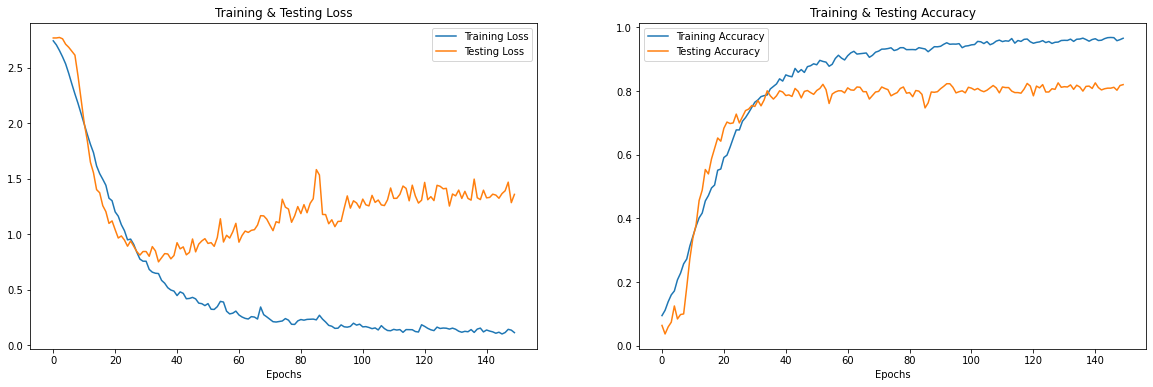

In [87]:
#CNN
epochs = [i for i in range(150)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [88]:
#CNN
pred_test = model.predict(x_testcnn)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,female_surprise,female_surprise
1,male_angry,male_angry
2,female_calm,female_calm
3,female_happy,female_happy
4,female_sad,female_sad
5,female_surprise,female_surprise
6,male_sad,male_sad
7,male_fear,male_fear
8,female_sad,female_sad
9,male_calm,male_calm


# Confusion Matrix Using CNN

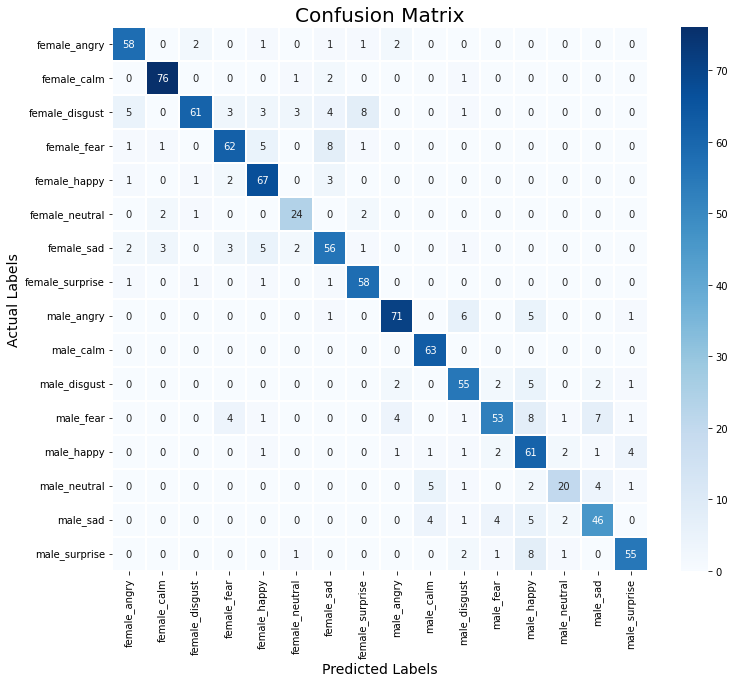

In [89]:
#CNN
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

# Classification Report Using CNN

In [90]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

   female_angry       0.85      0.89      0.87        65
    female_calm       0.93      0.95      0.94        80
 female_disgust       0.92      0.69      0.79        88
    female_fear       0.84      0.79      0.82        78
   female_happy       0.80      0.91      0.85        74
 female_neutral       0.77      0.83      0.80        29
     female_sad       0.74      0.77      0.75        73
female_surprise       0.82      0.94      0.87        62
     male_angry       0.89      0.85      0.87        84
      male_calm       0.86      1.00      0.93        63
   male_disgust       0.79      0.82      0.80        67
      male_fear       0.85      0.66      0.75        80
     male_happy       0.65      0.82      0.73        74
   male_neutral       0.77      0.61      0.68        33
       male_sad       0.77      0.74      0.75        62
  male_surprise       0.87      0.81      0.84        68

       accuracy              

After completing the all training part we got good accuracy using CNN so we plot the confusion matrix and classification report.

# SAVING THE MODE

In [91]:
model_name = 'model3.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/model3.h5 


In [92]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [99]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/SPEECH_EMOTION_RECOGNITION/model3.h5")
print("Loaded model from disk")

Loaded model from disk


# LIVE DEMO

In [100]:
data, sampling_rate = librosa.load("/content/drive/MyDrive/SPEECH_EMOTION_RECOGNITION/test.wav")

In [101]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 

Populating the interactive namespace from numpy and matplotlib


In [109]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('../content/drive/MyDrive/SPEECH_EMOTION_RECOGNITION/data/Actor_08/03-01-01-01-01-01-08.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [110]:
livedf2= pd.DataFrame(data=livedf2)
livedf2 = livedf2.stack().to_frame().T
livedf2

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-58.452599,-54.180382,-49.728397,-51.274837,-51.939064,-52.804298,-54.458553,-52.76355,-52.707867,-50.038662,...,-54.011433,-51.501019,-52.596626,-52.92189,-52.165344,-53.209713,-55.509731,-55.962559,-54.742569,-51.877007
